In [ ]:
#!pip install -U PyYAML

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

path = "drive/MyDrive/sata/"


import os
files = [f for f in os.listdir(path) if 'yaml' in f]
for f in files:
    print (f)


import yaml
data = []
for f in files:
    with open(path + f) as file:
        data.append(yaml.load(file,Loader=yaml.Loader))
        
        

1136609.yaml
1136575.yaml
1178421.yaml
1082630 (2).yaml
1082630 (1).yaml
980931.yaml
1136605.yaml
1136586.yaml
1175372.yaml
1136578.yaml
980927.yaml
1082615.yaml
1082645.yaml
1178407.yaml
1136584.yaml
1175362.yaml
1136574.yaml
1175365.yaml
980935.yaml
1082633 (2).yaml
980939.yaml
980995.yaml
1178403.yaml
1082634 (2).yaml
1175358.yaml
1178426.yaml
1136585.yaml
1178422.yaml
1136564.yaml
1175356.yaml
1136593.yaml
1178411.yaml
980977.yaml
1082649.yaml
1178412.yaml
1178416.yaml
980943.yaml
1178395.yaml
980951.yaml
980905.yaml
1082620.yaml
980937.yaml
981003.yaml
980969.yaml
1136618.yaml
1181767.yaml
1178406.yaml
981013.yaml
1082603.yaml
981011.yaml
1178408.yaml
1082627 (2).yaml
1136582.yaml
1082636 (2).yaml
1136581.yaml
1136600.yaml
1175360.yaml
980901.yaml
1082608.yaml
1178401.yaml
1082623.yaml
1178419.yaml
1136602.yaml
1136562.yaml
981015.yaml
1136568.yaml
1082628 (2).yaml
1136572.yaml
1175359.yaml
1082631 (2).yaml
1175364.yaml
980949.yaml
980965.yaml
1136565.yaml
1136590.yaml
980963.yaml

In [3]:

data[1]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'AM Rahane',
   'bowler': 'PP Chawla',
   'non_striker': 'DJM Short',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.2: {'batsman': 'DJM Short',
   'bowler': 'PP Chawla',
   'non_striker': 'AM Rahane',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'DJM Short',
   'bowler': 'PP Chawla',
   'non_striker': 'AM Rahane',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.4: {'batsman': 'DJM Short',
   'bowler': 'PP Chawla',
   'non_striker': 'AM Rahane',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.5: {'batsman': 'AM Rahane',
   'bowler': 'PP Chawla',
   'non_striker': 'DJM Short',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'AM Rahane',
   'bowler': 'PP Chawla',
   'non_striker': 'DJM Short',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {1.1: {'batsman': 'AM Rahane',
   'bowler': 'Kuldeep Yadav',
   'non_striker': 'DJM Short',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1

## Graph Generation  

### Extracting nodes and edges

In [4]:

def construct__bowler_batsman_runs__tuple(data_match,inning):
    

    bowler = []
    batsman = []
    runs = []
    

    if inning is 2:
        key_inning = '2nd innings'
    elif inning is 1:
        key_inning = '1st innings'
    else:
        raise Exception("Error: innings is either 1 or 2.")
        return        
     
    _data = data_match['innings'][inning-1][key_inning]['deliveries'] 

    noOfOvers = len(_data)   

    for over in range(0,noOfOvers):
        ballsinOver = _data[over].keys()
        for ball in ballsinOver:
            bowler.append(_data[over][ball]['bowler'])
            batsman.append(_data[over][ball]['batsman'])
            runs.append(_data[over][ball]['runs']['total'])
            
     
    bowler_batsman = zip(bowler,batsman)
    bowler_batsman__runs = zip(bowler_batsman,runs)
    
    bowler_batsman__runs = [((bo,ba),ru) for((bo,ba),ru) in bowler_batsman__runs]
    
    return bowler_batsman__runs
    

In [5]:

from collections import defaultdict
def create_edges_for_graph_bo_ba_ru(bowler_batsman__runs):  
    

    
    ddict = defaultdict(list)
    for boba_r in bowler_batsman__runs:

        for k,v in boba_r:
            ddict[k].append(v)     
   
    
    for k in ddict.keys():
        ddict[k] = sum(ddict[k])
        
    edges = list(zip( ddict.keys(), ddict.values() ) )
    
    
    return [(bo,ba,r) for (bo,ba),r in edges]   

In [6]:


nested_tuple_result=construct__bowler_batsman_runs__tuple(data[100],1)
nested_tuple_result.extend(construct__bowler_batsman_runs__tuple(data[100],2))
tuples_for_edges_bo_ba_ru = create_edges_for_graph_bo_ba_ru([nested_tuple_result])
print(tuples_for_edges_bo_ba_ru)
 

[('S Nadeem', 'DR Smith', 9), ('S Nadeem', 'BB McCullum', 1), ('K Rabada', 'BB McCullum', 0), ('K Rabada', 'SK Raina', 14), ('PJ Cummins', 'SK Raina', 11), ('PJ Cummins', 'KD Karthik', 8), ('Mohammed Shami', 'SK Raina', 19), ('K Rabada', 'KD Karthik', 0), ('Mohammed Shami', 'KD Karthik', 17), ('A Mishra', 'SK Raina', 6), ('A Mishra', 'KD Karthik', 17), ('MN Samuels', 'SK Raina', 20), ('MN Samuels', 'KD Karthik', 2), ('S Nadeem', 'KD Karthik', 13), ('S Nadeem', 'SK Raina', 5), ('CJ Anderson', 'SK Raina', 2), ('CJ Anderson', 'KD Karthik', 10), ('Mohammed Shami', 'AJ Finch', 4), ('PJ Cummins', 'Ishan Kishan', 1), ('PJ Cummins', 'AJ Finch', 10), ('CJ Anderson', 'AJ Finch', 4), ('CJ Anderson', 'Ishan Kishan', 3), ('K Rabada', 'Ishan Kishan', 1), ('K Rabada', 'AJ Finch', 10), ('PJ Cummins', 'RA Jadeja', 1), ('K Rabada', 'RA Jadeja', 2), ('K Rabada', 'JP Faulkner', 1), ('CJ Anderson', 'JP Faulkner', 1), ('CJ Anderson', 'RA Jadeja', 15), ('CJ Anderson', 'PJ Sangwan', 1), ('PJ Sangwan', 'SV Sam

#### Building an Example Graph

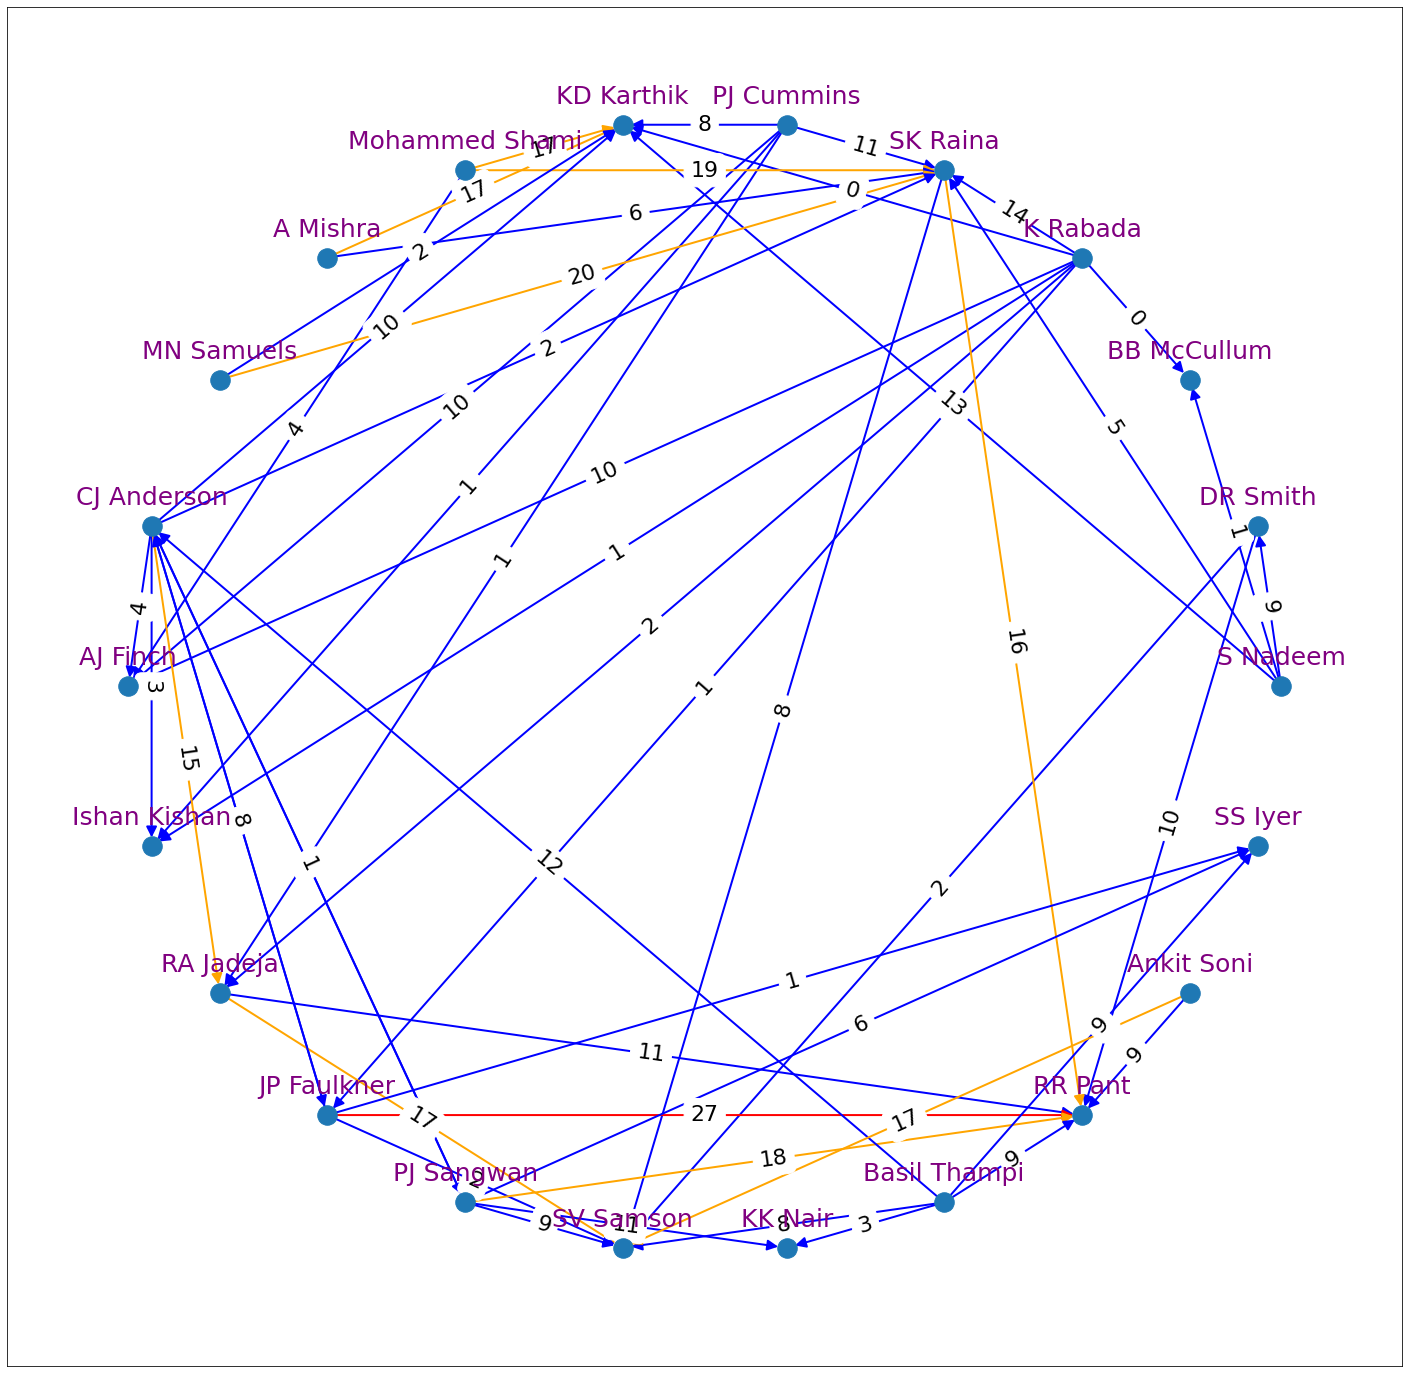

In [7]:
import matplotlib.pyplot as plt
import networkx as nx 

G = nx.DiGraph()
plt.figure(figsize=(25,25))  

for tup in tuples_for_edges_bo_ba_ru:
    bo,ba,ru = tup       
    G.add_weighted_edges_from([(bo,ba,ru)])


edge_colors = [] 
for e  in G.edges():
    n1,n2 = e
    if G[n1][n2]["weight"] > 25:         
        edge_colors.append('red')
    elif G[n1][n2]["weight"] > 14:
        edge_colors.append('orange')
    else:
        edge_colors.append('blue')    
    
pos = []
pos = nx.circular_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=380)
nx.draw_networkx_edges(G, pos, width=2,arrowsize=22,edge_color=edge_colors)

## Adding the labels and changing font, font size.
weight_labels = nx.get_edge_attributes(G,'weight') 
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels,font_size=22, font_family="sans-serif") 

## Positioning the labels appropriately.
label_pos = pos
for k in pos.keys():
    label_pos[k]=pos[k]+[0,0.05]
nx.draw_networkx_labels(G, label_pos, font_size=25, font_family="sans-serif",font_color = 'purple')
plt.savefig('batter.png')

In [8]:
#Let us apply PageRank to this Graph
pr = nx.pagerank(G, alpha=0.9)

In [ ]:
pr
sorted(pr.items(), key=lambda x: x[1],reverse = True)


In [10]:
sorted(G.out_degree, key=lambda x: x[1], reverse=True)


[('K Rabada', 7),
 ('CJ Anderson', 7),
 ('PJ Cummins', 5),
 ('PJ Sangwan', 5),
 ('Basil Thampi', 5),
 ('S Nadeem', 4),
 ('JP Faulkner', 4),
 ('Mohammed Shami', 3),
 ('DR Smith', 2),
 ('SK Raina', 2),
 ('A Mishra', 2),
 ('MN Samuels', 2),
 ('RA Jadeja', 2),
 ('Ankit Soni', 2),
 ('BB McCullum', 0),
 ('KD Karthik', 0),
 ('AJ Finch', 0),
 ('Ishan Kishan', 0),
 ('SV Samson', 0),
 ('KK Nair', 0),
 ('RR Pant', 0),
 ('SS Iyer', 0)]

In [11]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)


[('SK Raina', 7),
 ('KD Karthik', 7),
 ('SV Samson', 7),
 ('RR Pant', 7),
 ('AJ Finch', 4),
 ('CJ Anderson', 3),
 ('Ishan Kishan', 3),
 ('RA Jadeja', 3),
 ('SS Iyer', 3),
 ('BB McCullum', 2),
 ('JP Faulkner', 2),
 ('KK Nair', 2),
 ('DR Smith', 1),
 ('PJ Sangwan', 1),
 ('S Nadeem', 0),
 ('K Rabada', 0),
 ('PJ Cummins', 0),
 ('Mohammed Shami', 0),
 ('A Mishra', 0),
 ('MN Samuels', 0),
 ('Basil Thampi', 0),
 ('Ankit Soni', 0)]

In [12]:
sorted(G.degree, key=lambda x: x[1], reverse=True)


[('CJ Anderson', 10),
 ('SK Raina', 9),
 ('K Rabada', 7),
 ('KD Karthik', 7),
 ('SV Samson', 7),
 ('RR Pant', 7),
 ('JP Faulkner', 6),
 ('PJ Sangwan', 6),
 ('PJ Cummins', 5),
 ('RA Jadeja', 5),
 ('Basil Thampi', 5),
 ('S Nadeem', 4),
 ('AJ Finch', 4),
 ('DR Smith', 3),
 ('Mohammed Shami', 3),
 ('Ishan Kishan', 3),
 ('SS Iyer', 3),
 ('BB McCullum', 2),
 ('A Mishra', 2),
 ('MN Samuels', 2),
 ('KK Nair', 2),
 ('Ankit Soni', 2)]

### Constructing edges and nodes for dismissals by bowlers

In [13]:


def construct__bowler_batsman__dismissal_tuple(data_match,inning):
    
    bowler = []
    batsman = []    
    
    
    if inning is 2:
        key_inning = '2nd innings'
    elif inning is 1:
        key_inning = '1st innings'
    else:
        raise Exception("Error: innings is either 1 or 2.")
        return      
    
    _data = data_match['innings'][inning-1][key_inning]['deliveries'] 
    
    noOfOvers = len(_data)   
    
   
    for over in range(0,noOfOvers):
        ballsinOver = _data[over].keys()
        for ball in ballsinOver:
            if 'wicket' in _data[over][ball].keys():
                bowler.append(_data[over][ball]['bowler'])
                batsman.append(_data[over][ball]['batsman'])
            
        
    bowler_batsman = zip(bowler,batsman)
    
        
    bowler_batsman = [(ba,bo)  for (bo,ba) in bowler_batsman]
    
    return bowler_batsman 
    

In [14]:


from collections import defaultdict
def create_edges_for_graph_bo_ba_dismissals(bowler_batsman__dismissals):
    
    bo_ba_set = set(bowler_batsman__dismissals)    
    freq_dict = {}
    
    for bo_ba in bo_ba_set:
        freq_dict[bo_ba] = bowler_batsman__dismissals.count(bo_ba)
        
    edges =  list(zip(freq_dict.keys(),freq_dict.values()))
    return [(bo,ba,w) for (bo,ba),w in edges] 
    
    
        



In [15]:

dismissals_boba_tuples =[]
for d in range(0,len(data)):
  dismissals_boba_tuples.extend(construct__bowler_batsman__dismissal_tuple(data[d],1))  
  dismissals_boba_tuples.extend(construct__bowler_batsman__dismissal_tuple(data[d],2))


print(dismissals_boba_tuples)
edges_bo_ba_wickets = create_edges_for_graph_bo_ba_dismissals(dismissals_boba_tuples)

for e in edges_bo_ba_wickets:
    (bo,ba,w) = e
    if bo in ['B Kumar']:
        print(e)
edges_bo_ba_wickets

[('RA Tripathi', 'AD Russell'), ('AM Rahane', 'Kuldeep Yadav'), ('JC Buttler', 'Kuldeep Yadav'), ('SV Samson', 'SP Narine'), ('STR Binny', 'Kuldeep Yadav'), ('K Gowtham', 'Shivam Mavi'), ('BA Stokes', 'Kuldeep Yadav'), ('IS Sodhi', 'M Prasidh Krishna'), ('JC Archer', 'AD Russell'), ('JD Unadkat', 'M Prasidh Krishna'), ('SP Narine', 'BA Stokes'), ('RV Uthappa', 'BA Stokes'), ('N Rana', 'IS Sodhi'), ('CA Lynn', 'BA Stokes'), ('AM Rahane', 'N Rana'), ('SV Samson', 'Shivam Mavi'), ('DJM Short', 'N Rana'), ('RA Tripathi', 'Kuldeep Yadav'), ('BA Stokes', 'PP Chawla'), ('K Gowtham', 'TK Curran'), ('S Gopal', 'TK Curran'), ('JC Buttler', 'Shivam Mavi'), ('CA Lynn', 'K Gowtham'), ('SP Narine', 'S Gopal'), ('RV Uthappa', 'K Gowtham'), ('PP Shaw', 'UT Yadav'), ('S Dhawan', 'YS Chahal'), ('RR Pant', 'YS Chahal'), ('SS Iyer', 'Washington Sundar'), ('CA Ingram', 'NA Saini'), ('PA Patel', 'K Rabada'), ('V Kohli', 'AR Patel'), ('AB de Villiers', 'SE Rutherford'), ('H Klaasen', 'A Mishra'), ('S Dube', 

[('KK Nair', 'PJ Sangwan', 3),
 ('KH Pandya', 'DR Smith', 1),
 ('JC Buttler', 'RD Chahar', 1),
 ('IK Pathan', 'KH Pandya', 1),
 ('AD Hales', 'HV Patel', 1),
 ('DJ Bravo', 'JC Archer', 1),
 ('N Rana', 'SL Malinga', 1),
 ('RR Pant', 'RA Jadeja', 1),
 ('C Munro', 'RA Jadeja', 1),
 ('AM Rahane', 'T Natarajan', 1),
 ('DJ Bravo', 'MA Starc', 1),
 ('DA Miller', 'MC Henriques', 1),
 ('CH Gayle', 'MC Henriques', 1),
 ('SK Raina', 'HH Pandya', 2),
 ('MS Dhoni', 'I Sharma', 1),
 ('YK Pathan', 'DJ Bravo', 1),
 ('SN Khan', 'Mohammed Shami', 1),
 ('YK Pathan', 'Mustafizur Rahman', 1),
 ('S Dhawan', 'Harbhajan Singh', 2),
 ('STR Binny', 'S Aravind', 1),
 ('Kuldeep Yadav', 'S Aravind', 1),
 ('RA Jadeja', 'KH Pandya', 1),
 ('DJM Short', 'YS Chahal', 1),
 ('BB McCullum', 'Bipul Sharma', 2),
 ('SPD Smith', 'DJ Bravo', 2),
 ('YS Chahal', 'C de Grandhomme', 1),
 ('DJ Hooda', 'DJ Bravo', 2),
 ('CH Morris', 'NA Saini', 1),
 ('WP Saha', 'JD Unadkat', 1),
 ('V Shankar', 'VR Aaron', 1),
 ('AM Rahane', 'DL Chaha

#### Building another example graph

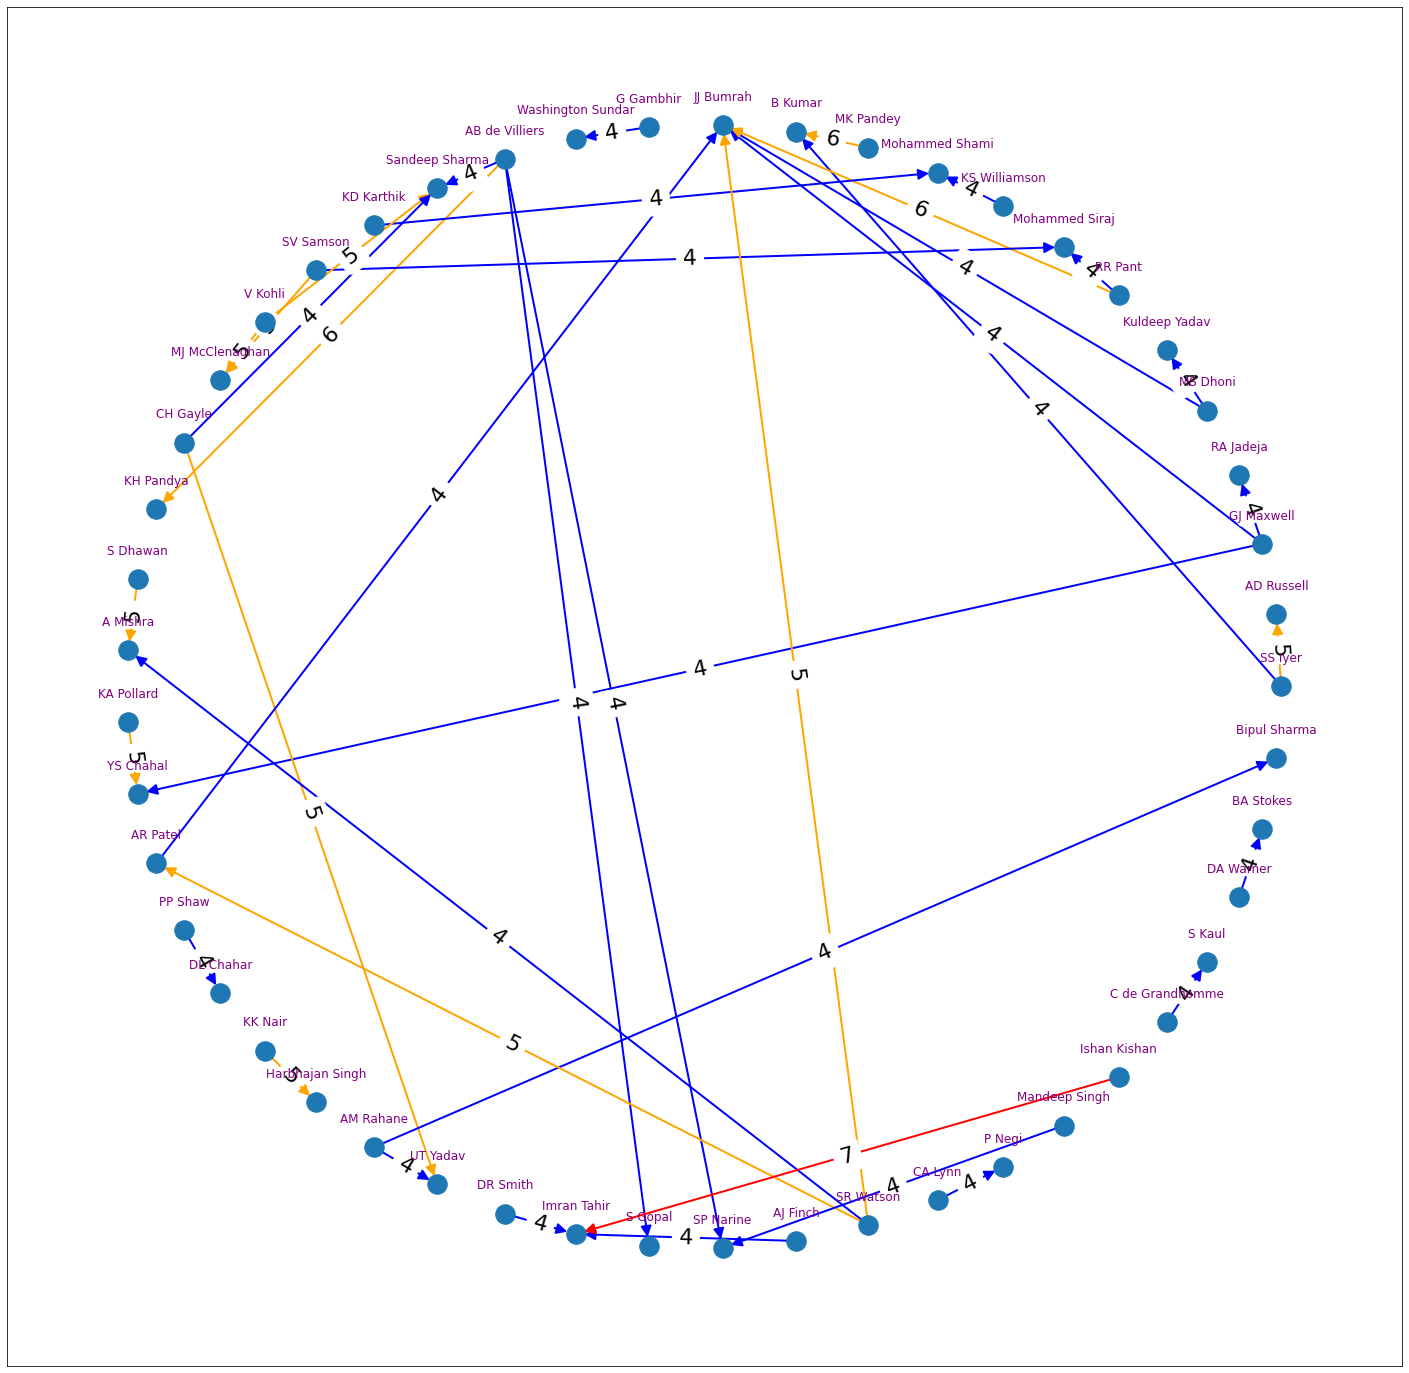

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
 

B = nx.DiGraph()
plt.figure(figsize=(25,25)) 
 

for edge in edges_bo_ba_wickets:
    bo,ba,w = edge 
    ### Only bowlers who dismissed a batsman more than 3 times are added into the graph

    if w>3:

        B.add_weighted_edges_from([(bo,ba,w)])

## Coloring the edges based wickets dismissed
edge_colors = [] 
for e  in B.edges():
    n1,n2 = e
    if B[n1][n2]["weight"] > 6:         
        edge_colors.append('red')
    elif B[n1][n2]["weight"] > 4:
        edge_colors.append('orange')
    else:
        edge_colors.append('blue')    

    
pos = []
pos = nx.circular_layout(B)  # positions for all nodes


nx.draw_networkx_nodes(B, pos, node_size=380)
nx.draw_networkx_edges(B, pos, width=2,arrowsize=22,edge_color=edge_colors)

weight_labels = nx.get_edge_attributes(B,'weight') 
nx.draw_networkx_edge_labels(B,pos,edge_labels=weight_labels,font_size=22, font_family="sans-serif") 

label_pos = pos
for k in pos.keys():
    label_pos[k]=pos[k]+[0,0.05]
nx.draw_networkx_labels(B, label_pos, font_size=12, font_family="sans-serif",font_color = 'purple')
plt.savefig('bowler.png')